In [1]:
import numpy as np
np.bool = np.bool_
import copy as cp
import sys
import matplotlib as mt
import matplotlib.pyplot as plt
import pickle as pkl
import sklearn as skl
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split as splt
from sklearn.metrics import accuracy_score as acc, confusion_matrix as cfm
import scipy as sc
import scipy.cluster as scc
from tqdm import tqdm
import time
import pyemma
import pyemma.coordinates as coor
import pyemma.plots as mplt

In [2]:
sys.path.append('../0_python_modules/')

In [3]:
import proximity_matrix as pmt
import synthetic_data as syn
import extras
from navjeet_hist import hist_raw_data
import navjeet_hist as nh

## procedure:

<font size=4>
    input data - 100 ps T4L data (Fig S9) without labels <br><br>
    create synthetic data with artificial labels (permute) <br><br>
    Random forest on artificial labels (unsupervised) <br><br>
    proximity distance calculation <br><br>
    clustering - hierarchial - average <br><br>
    random forest on labels generated by clustering <br><br>
    important feature selection <br><br>
    reproducing the Fig S9 results <br><br>
</font>

## input data and proximity calculation

In [6]:
features = np.load('../1_datasets/t4l/features.npy')

In [6]:
dobj = syn.synthetic_data(features)
dobj.permute()
pfeatures, plabels = dobj.get_output()

permuted data generated -- and 5 clf models were created and pmt is calculated as mean <br>
synthetic_pmt.py

In [4]:
permute_pmt = np.load('saved_furf/permute_pmt_mean.npy')

In [5]:
permute_pmt.shape

(11876564260,)

## clustering

In [10]:
hc_average = scc.hierarchy.linkage(permute_pmt, method='average')

In [11]:
np.save('saved_furf/hc_average.npy', hc_average)

In [4]:
hc_average = np.load('saved_furf/hc_average.npy')

In [6]:
for i in range(2,11):
    hlabels_ = extras.get_hc_dtraj(hc_average, nids=i)
    pops_ = {}
    for j in np.unique(hlabels_):
        pops_[int(j)] = len(np.where(hlabels_ == j)[0])
    print(pops_)
    np.save(f'saved_furf/hlabels_{i}.npy', hlabels_)

{0: 49319, 1: 104802}
{0: 49319, 1: 37, 2: 104765}
{0: 37, 1: 104765, 2: 2, 3: 49317}
{0: 37, 1: 2, 2: 49317, 3: 2, 4: 104763}
{0: 37, 1: 2, 2: 49317, 3: 2, 4: 1, 5: 104762}
{0: 37, 1: 2, 2: 49317, 3: 2, 4: 1, 5: 4, 6: 104758}
{0: 37, 1: 2, 2: 2, 3: 1, 4: 4, 5: 104758, 6: 300, 7: 49017}
{0: 37, 1: 2, 2: 2, 3: 1, 4: 4, 5: 300, 6: 49017, 7: 3, 8: 104755}
{0: 37, 1: 2, 2: 2, 3: 1, 4: 4, 5: 300, 6: 49017, 7: 3, 8: 1, 9: 104754}


## efficiency

In [7]:
traj_data = [np.load(f'traj_specific_data/features_{i}.npy') for i in range(6)]
dists = [np.loadtxt(f'traj_specific_data/distances{i}.xvg', comments=['@','#'], usecols=[3]) for i in [0,4,3]]

In [5]:
randoms = np.loadtxt('../1_datasets/randoms.txt', dtype=int)

In [11]:
for h in range(2,11):
    
    for i in range(len(randoms)):
        
        fimp_ = np.load(f'saved_furf/fimp_hlabel{h}_{i}.npy')
        top200 = fimp_.argsort()[::-1][:200]
        
        tic2 = [traj_data[i][:,top200] for i in range(6)]
        tic2 = coor.tica(tic2, lag=100, dim=2).get_output()
        tic2 = [tic2[0], tic2[4], tic2[3]]
        
        hists_ = []
        extents_ = np.zeros(( len(dists), 4 ))
        for j in range(len(dists)):
            hh = nh.hist_range(tic2[j], dists[j], mini=0, maxi=0.6)
            extents_[j] = hh[:4]
            hists_.append(hh[4])
            
        np.save(f'saved_furf/extents_{h}_{i}.npy', extents_)
        np.save(f'saved_furf/hists_{h}_{i}.npy', hists_)
        
        globals()[f'extents_{h}_{i}'] = extents_
        globals()[f'hists_{h}_{i}'] = hists_

/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:169: RuntimeWarning: invalid value encountered in divide
  fraction = np.divide(fraction, norm)


In [13]:
classification_extent = np.zeros((9,len(randoms), len(dists)))

weight = [ np.where(dists[i] < 0.6)[0].shape[0] / dists[i].shape[0] for i in range(len(dists)) ]

for h in range(2,11):
    
    for i in range(len(randoms)):
        hists_ = eval(f'hists_{h}_{i}')
        
        for j in range(len(dists)):
            
            classification_extent[h-2,i,j] = nh.classification_extent( hists_[j], 
                                                             output_type='jm', operation=2, 
                                                              jm_lower=weight[j], jm_impure=weight[j])

In [18]:
np.save('saved_furf/classification_extent.npy', classification_extent)

In [25]:
classification_extent[6]

array([[0.96566734, 0.94126429, 0.93678967],
       [0.96449685, 0.94077215, 0.91858272],
       [0.9656102 , 0.9414208 , 0.9043114 ],
       [0.96777917, 0.94075297, 0.89108707],
       [0.96651059, 0.94149976, 0.92497334]])

In [25]:
impures = np.arange(0.01,1,0.01)
classification_extent = np.zeros((len(impures), 9, len(randoms), len(dists)))

weight = [ np.where(dists[i] < 0.6)[0].shape[0] / dists[i].shape[0] for i in range(len(dists)) ]

for h in range(2,11):
    
    for i in range(len(randoms)):
        hists_ = np.load(f'saved_furf/hists_{h}_{i}.npy')
#         hists_ = eval(f'hists_{h}_{i}')
        
        for j in range(len(dists)):
            
            for im in range(len(impures)):
            
                classification_extent[im,h-2,i,j] = nh.classification_extent( hists_[j], 
                                                                 output_type='jm', operation=1, 
                                                                  jm_lower=weight[j], jm_impure=impures[im])

In [26]:
classification_extent.shape

(99, 9, 5, 3)

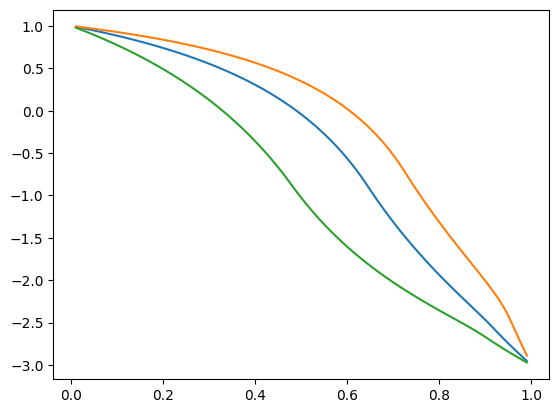

In [27]:
plt.plot( impures, classification_extent[:,1,0,0] )
plt.plot( impures, classification_extent[:,1,0,1] )
plt.plot( impures, classification_extent[:,1,0,2] )

## supervised_clusters based on hc labels

In [7]:
for i in tqdm(range(2,11)):
    
    xtrain, _, ytrain, _ = splt(features, eval(f'permute_hc_average_labels{i}'), random_state=0, test_size=0.3)
    
    clf_ = rfc(n_estimators=1000, random_state=0, n_jobs=16)
    clf_.fit(xtrain, ytrain)
    
    globals()[f'clf_hc_average_labels{i}'] = cp.deepcopy(clf_)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [33:02<00:00, 220.33s/it]


### the RF models should be able to learn something out

### we should remove the outlier, otherwise the f_min scores will be either 0 or 1

In [8]:
for i in range(2,11):
    _, xtest, _, ytest = splt(features, eval(f'permute_hc_average_labels{i}'), random_state=0, test_size=0.3)
    
    clf_ = eval(f'clf_hc_average_labels{i}')
    pred_ = clf_.predict(xtest)
    print(f'{i} \t {acc(ytest, pred_)} \t {extras.get_f1_score( cfm(ytest, pred_), output_type="all" )}')

2 	 1.0 	 1
3 	 0.999826978393927 	 [0.99987314 0.999728  ]
4 	 0.999826978393927 	 [0.99987314 0.999728  ]
5 	 0.999826978393927 	 [0.99987314 0.999728  ]


/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/extras.py:214: RuntimeWarning: invalid value encountered in scalar divide
  f2 = cmt[i,i] / np.sum(cmt[:,i])


6 	 0.9998053506931678 	 [0.999728          nan 0.99985728]


/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/extras.py:214: RuntimeWarning: invalid value encountered in scalar divide
  f2 = cmt[i,i] / np.sum(cmt[:,i])


7 	 0.9997837229924087 	 [0.999728          nan        nan 0.99984142]


/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/extras.py:214: RuntimeWarning: invalid value encountered in scalar divide
  f2 = cmt[i,i] / np.sum(cmt[:,i])


8 	 0.9997837229924087 	 [0.999728          nan        nan 0.99984142]


/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/extras.py:214: RuntimeWarning: invalid value encountered in scalar divide
  f2 = cmt[i,i] / np.sum(cmt[:,i])


9 	 0.9994160520795035 	 [0.99962604        nan        nan        nan 0.999651  ]
10 	 0.9993944243787443 	 [0.99962604        nan        nan        nan        nan 0.99963513]


/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/extras.py:214: RuntimeWarning: invalid value encountered in scalar divide
  f2 = cmt[i,i] / np.sum(cmt[:,i])


### ok ok learning, some outliers causing problem

In [9]:
for i in range(2,11):
    clf_ = eval(f'clf_hc_average_labels{i}')
    pkl.dump(clf_, open(f'saved_models/clf_hc_average_labels{i}.pkl', 'wb'))

In [5]:
for i in range(3,11):
    globals()[f'clf_hc_average_labels{i}'] = pkl.load(open(f'saved_models/clf_hc_average_labels{i}.pkl', 'rb'))

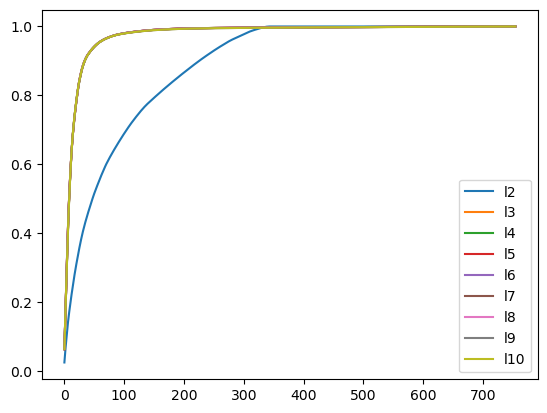

In [10]:
for i in range(2,11):
    dd = eval(f'clf_hc_average_labels{i}').feature_importances_
    np.save(f'saved_data/fimp_hc_average_labels{i}.npy', dd)
    plt.plot(np.cumsum(dd[dd.argsort()[::-1]]), label=f'l{i}')
plt.legend()

### classification is almost same after 2 labels

## checking results

#### aim is to see if the free energy surface is separable by new classification

In [17]:
for i in [0,4,3]:
    globals()[f'dist{i}'] = np.loadtxt(f'traj_specific_data/distances{i}.xvg', usecols=[3], comments=['@','#'])

/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:38: RuntimeWarning: invalid value encountered in divide
  histogram = np.divide(histogram, norm)


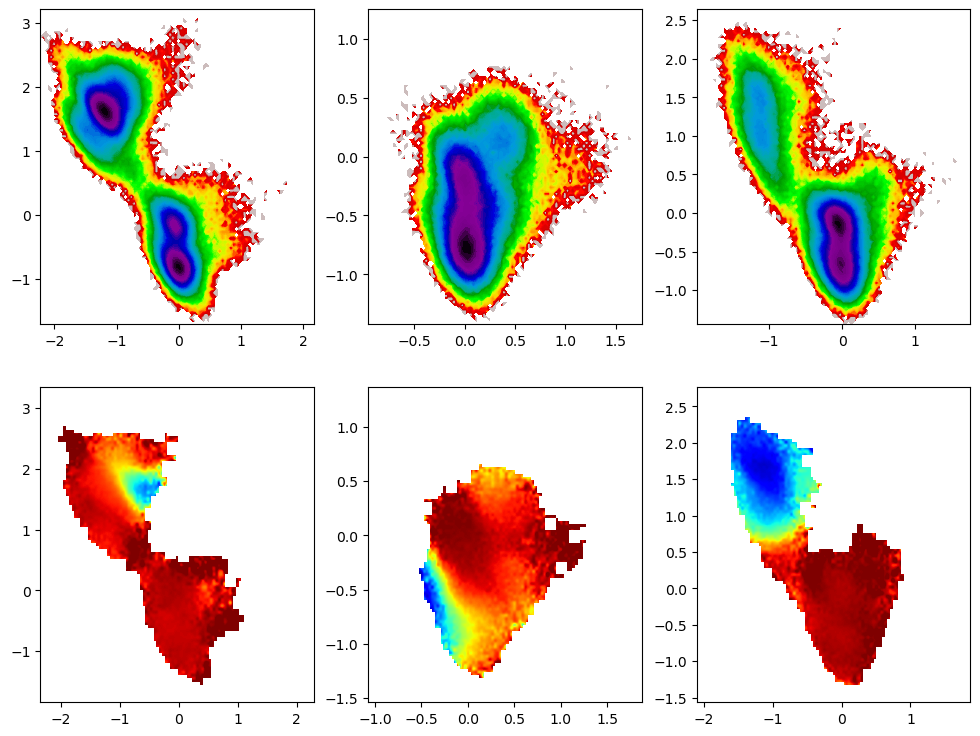

In [33]:
fimp = clf_hc_average_labels2.feature_importances_

top200 = fimp.argsort()[::-1][:200]

sfeatures = [np.load(f'traj_specific_data/features_{i}.npy')[:,top200] for i in range(6)]
sfeatures = coor.tica(sfeatures, lag=100).get_output()


fig, ((ax01,ax41,ax31),(ax02,ax42,ax32)) =plt.subplots(2,3,figsize=(12,9))

for i in [0,4,3]:
    
    mplt.plot_free_energy( sfeatures[i][:,0], sfeatures[i][:,1], ax=eval(f'ax{i}1'), cbar=False )
    
    xmin, xmax, ymin, ymax, hist = hist_raw_data( sfeatures[i], np.log(eval(f'dist{i}')) )
    
    eval(f'ax{i}2').imshow( hist.T, origin='lower', extent=(xmin,xmax,ymin,ymax), aspect='auto',
                          vmin=0, vmax=2, interpolation='gaussian', cmap='jet')

/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:38: RuntimeWarning: invalid value encountered in divide
  histogram = np.divide(histogram, norm)


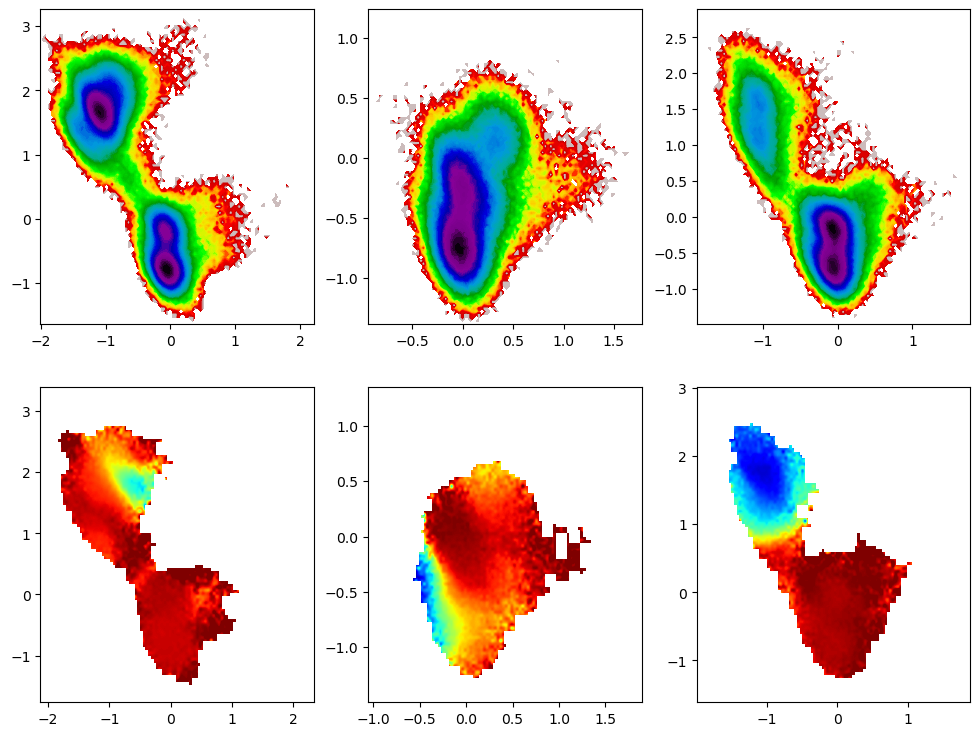

In [34]:
fimp = clf_hc_average_labels2.feature_importances_

top85 = np.where( np.cumsum(fimp[fimp.argsort()[::-1]]) > 0.85)[0][0]
top85 = fimp.argsort()[::-1][:top85]

sfeatures = [np.load(f'traj_specific_data/features_{i}.npy')[:,top85] for i in range(6)]
sfeatures = coor.tica(sfeatures, lag=100).get_output()


fig, ((ax01,ax41,ax31),(ax02,ax42,ax32)) =plt.subplots(2,3,figsize=(12,9))

for i in [0,4,3]:
    
    mplt.plot_free_energy( sfeatures[i][:,0], sfeatures[i][:,1], ax=eval(f'ax{i}1'), cbar=False )
    
    xmin, xmax, ymin, ymax, hist = hist_raw_data( sfeatures[i], np.log(eval(f'dist{i}')) )
    
    eval(f'ax{i}2').imshow( hist.T, origin='lower', extent=(xmin,xmax,ymin,ymax), aspect='auto',
                          vmin=0, vmax=2, interpolation='gaussian', cmap='jet')
    
plt.show()

## cls-3

/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:38: RuntimeWarning: invalid value encountered in divide
  histogram = np.divide(histogram, norm)


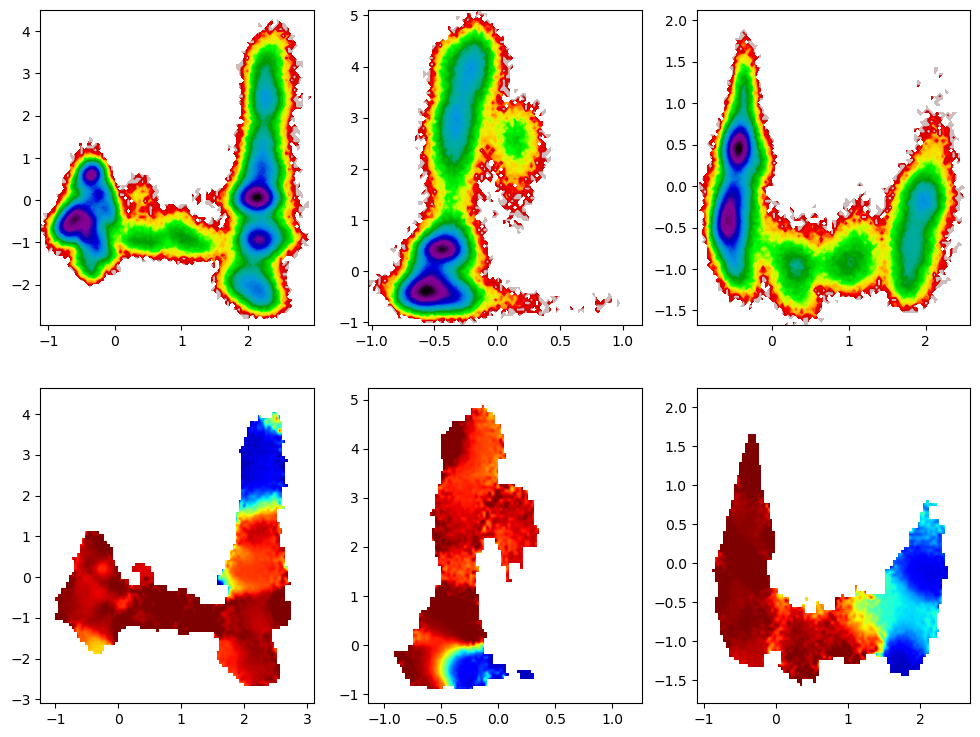

In [35]:
fimp = clf_hc_average_labels3.feature_importances_

top200 = fimp.argsort()[::-1][:200]

sfeatures = [np.load(f'traj_specific_data/features_{i}.npy')[:,top200] for i in range(6)]
sfeatures = coor.tica(sfeatures, lag=100).get_output()


fig, ((ax01,ax41,ax31),(ax02,ax42,ax32)) =plt.subplots(2,3,figsize=(12,9))

for i in [0,4,3]:
    
    mplt.plot_free_energy( sfeatures[i][:,0], sfeatures[i][:,1], ax=eval(f'ax{i}1'), cbar=False )
    
    xmin, xmax, ymin, ymax, hist = hist_raw_data( sfeatures[i], np.log(eval(f'dist{i}')) )
    
    eval(f'ax{i}2').imshow( hist.T, origin='lower', extent=(xmin,xmax,ymin,ymax), aspect='auto',
                          vmin=0, vmax=2, interpolation='gaussian', cmap='jet')

plt.show()

/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:38: RuntimeWarning: invalid value encountered in divide
  histogram = np.divide(histogram, norm)


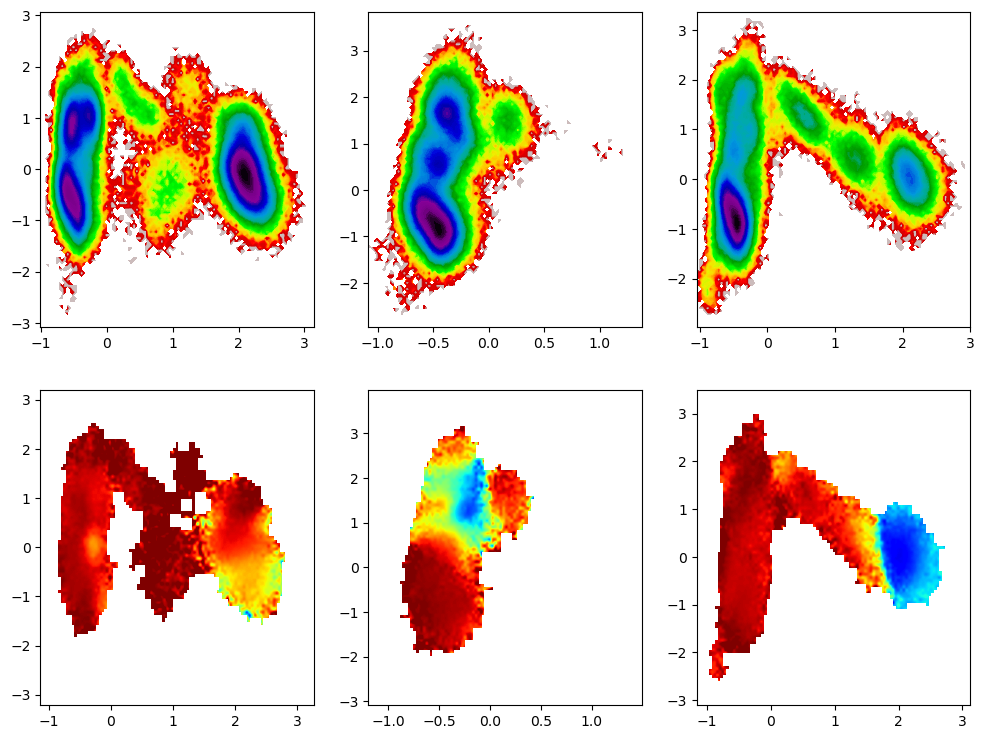

In [36]:
fimp = clf_hc_average_labels3.feature_importances_

top85 = np.where( np.cumsum(fimp[fimp.argsort()[::-1]]) > 0.85)[0][0]
top85 = fimp.argsort()[::-1][:top85]

sfeatures = [np.load(f'traj_specific_data/features_{i}.npy')[:,top85] for i in range(6)]
sfeatures = coor.tica(sfeatures, lag=100).get_output()


fig, ((ax01,ax41,ax31),(ax02,ax42,ax32)) =plt.subplots(2,3,figsize=(12,9))

for i in [0,4,3]:
    
    mplt.plot_free_energy( sfeatures[i][:,0], sfeatures[i][:,1], ax=eval(f'ax{i}1'), cbar=False )
    
    xmin, xmax, ymin, ymax, hist = hist_raw_data( sfeatures[i], np.log(eval(f'dist{i}')) )
    
    eval(f'ax{i}2').imshow( hist.T, origin='lower', extent=(xmin,xmax,ymin,ymax), aspect='auto',
                          vmin=0, vmax=2, interpolation='gaussian', cmap='jet')

plt.show()

## cls-10

/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:38: RuntimeWarning: invalid value encountered in divide
  histogram = np.divide(histogram, norm)


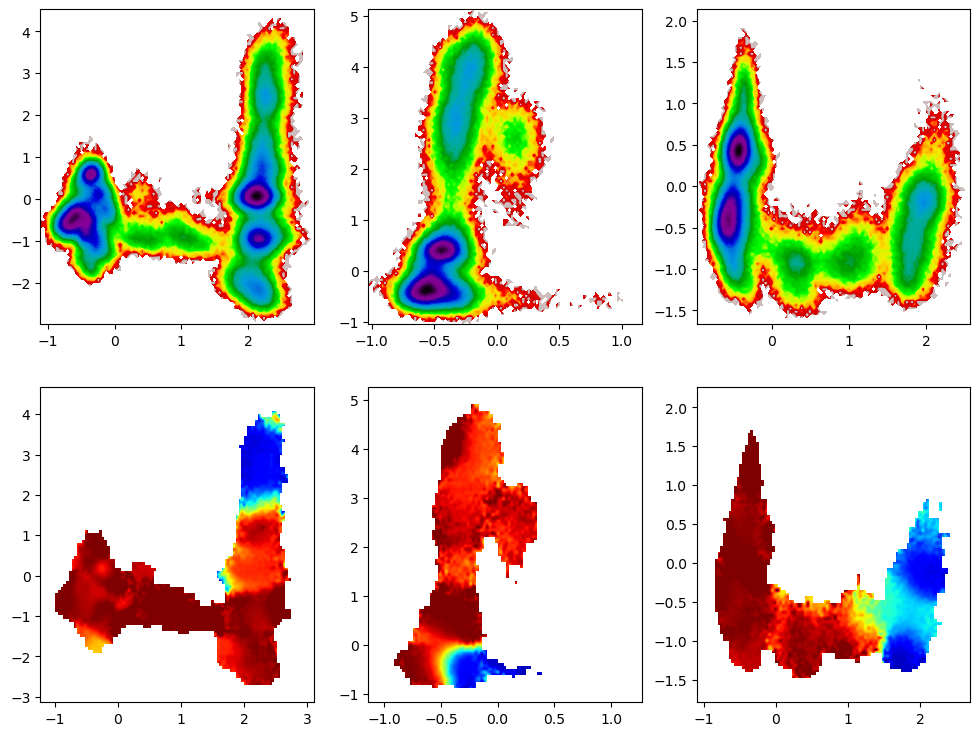

In [37]:
fimp = clf_hc_average_labels10.feature_importances_

top200 = fimp.argsort()[::-1][:200]

sfeatures = [np.load(f'traj_specific_data/features_{i}.npy')[:,top200] for i in range(6)]
sfeatures = coor.tica(sfeatures, lag=100).get_output()


fig, ((ax01,ax41,ax31),(ax02,ax42,ax32)) =plt.subplots(2,3,figsize=(12,9))

for i in [0,4,3]:
    
    mplt.plot_free_energy( sfeatures[i][:,0], sfeatures[i][:,1], ax=eval(f'ax{i}1'), cbar=False )
    
    xmin, xmax, ymin, ymax, hist = hist_raw_data( sfeatures[i], np.log(eval(f'dist{i}')) )
    
    eval(f'ax{i}2').imshow( hist.T, origin='lower', extent=(xmin,xmax,ymin,ymax), aspect='auto',
                          vmin=0, vmax=2, interpolation='gaussian', cmap='jet')

plt.show()

/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:38: RuntimeWarning: invalid value encountered in divide
  histogram = np.divide(histogram, norm)


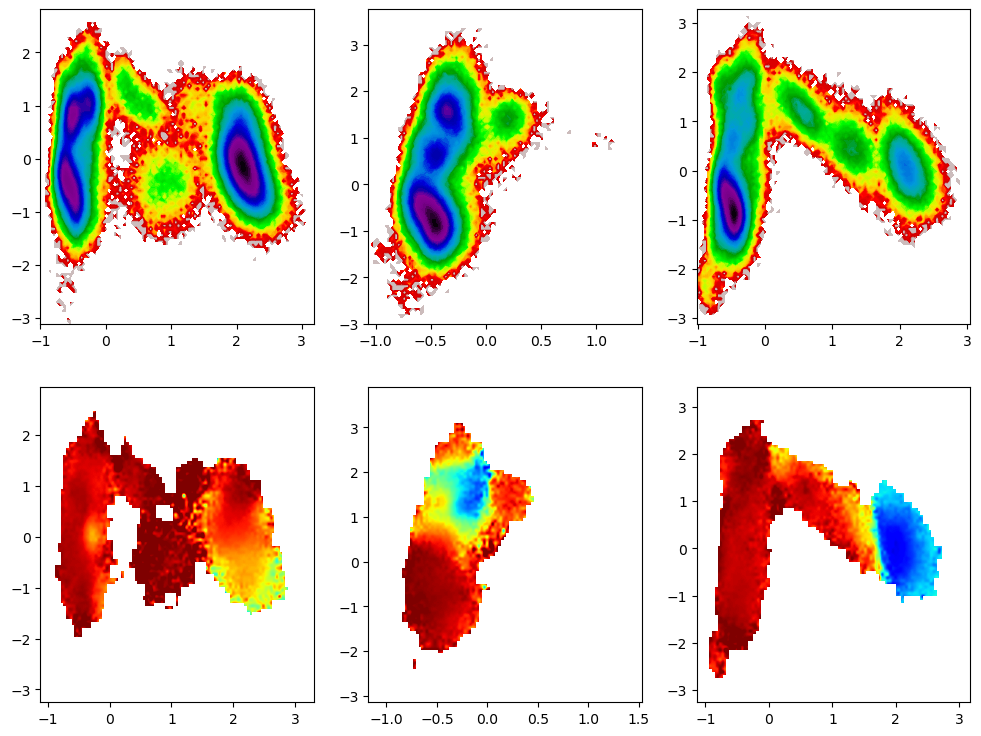

In [38]:
fimp = clf_hc_average_labels10.feature_importances_

top85 = np.where( np.cumsum(fimp[fimp.argsort()[::-1]]) > 0.85)[0][0]
top85 = fimp.argsort()[::-1][:top85]

sfeatures = [np.load(f'traj_specific_data/features_{i}.npy')[:,top85] for i in range(6)]
sfeatures = coor.tica(sfeatures, lag=100).get_output()


fig, ((ax01,ax41,ax31),(ax02,ax42,ax32)) =plt.subplots(2,3,figsize=(12,9))

for i in [0,4,3]:
    
    mplt.plot_free_energy( sfeatures[i][:,0], sfeatures[i][:,1], ax=eval(f'ax{i}1'), cbar=False )
    
    xmin, xmax, ymin, ymax, hist = hist_raw_data( sfeatures[i], np.log(eval(f'dist{i}')) )
    
    eval(f'ax{i}2').imshow( hist.T, origin='lower', extent=(xmin,xmax,ymin,ymax), aspect='auto',
                          vmin=0, vmax=2, interpolation='gaussian', cmap='jet')

plt.show()

## without outliers

<font size=4>
    Due to technical working of hierarchial clustering, with complex data it tends to give some outliers classes. Therefore, clustering into 2 classes doesnot necessarily mean 2 clusters, untill and unless the outliers are removed. As seen in above, the methodology works only after nclasses of 3 or more. <br><br>
    If we see, after 2 or more hierarchial clusterings, only 2 clusters are detected and hence all works in a similar fashion. <br><br>

In [20]:
nclasses_wo_outliers = []
for i in range(2,11):
    dd = extras.get_dtraj_outliers( eval(f'permute_hc_average_labels{i}'), return_new=True )
    dd = np.unique(dd[1])
    nclasses_wo_outliers.append(len(dd))

removed labels: [0.]
removed labels: [0.]
removed labels: [0. 2.]
removed labels: [0. 2. 3.]
removed labels: [0. 1. 2. 4.]
removed labels: [0. 1. 2. 4. 5.]
removed labels: [0. 1. 2. 4. 5. 6.]
removed labels: [0. 1. 2. 4. 5. 6. 7.]
removed labels: [0. 1. 2. 4. 5. 6. 7. 8.]


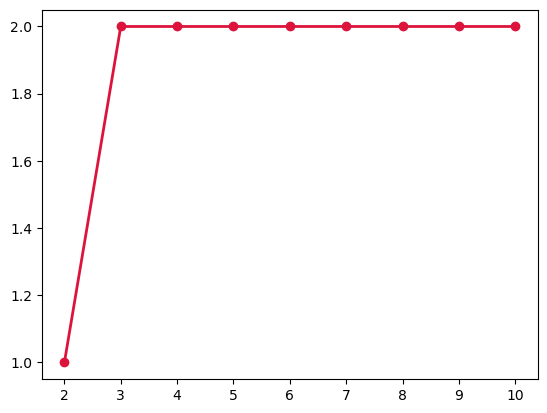

In [21]:
plt.plot(range(2,11), nclasses_wo_outliers, '-o', color='crimson', lw=2)

#### hence taking only two classes after outlier removal

In [30]:
outliers, wo_outliers_permute_hc_average_labels10 = extras.get_dtraj_outliers(permute_hc_average_labels10, 
                                                                    return_new=True, display=False)
wo_outliers_features = np.delete(features, outliers, axis=0)

xtrain, xtest, ytrain, ytest = splt(wo_outliers_features, wo_outliers_permute_hc_average_labels10, 
                                    test_size=0.3, random_state=0)

clf_wo_outliers_hc_average = rfc(n_estimators=1000, random_state=0, n_jobs=16)
clf_wo_outliers_hc_average.fit(xtrain, ytrain)

pred_ = clf_wo_outliers_hc_average.predict(xtest)

print('accuracy_test: \t', acc(ytest, pred_))
print('f1_score_test: \t', extras.get_f1_score( cfm(ytest, pred_), output_type='min' ))

accuracy_test: 	 0.9999134498874849
f1_score_test: 	 0.9998639733387744


/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:38: RuntimeWarning: invalid value encountered in divide
  histogram = np.divide(histogram, norm)


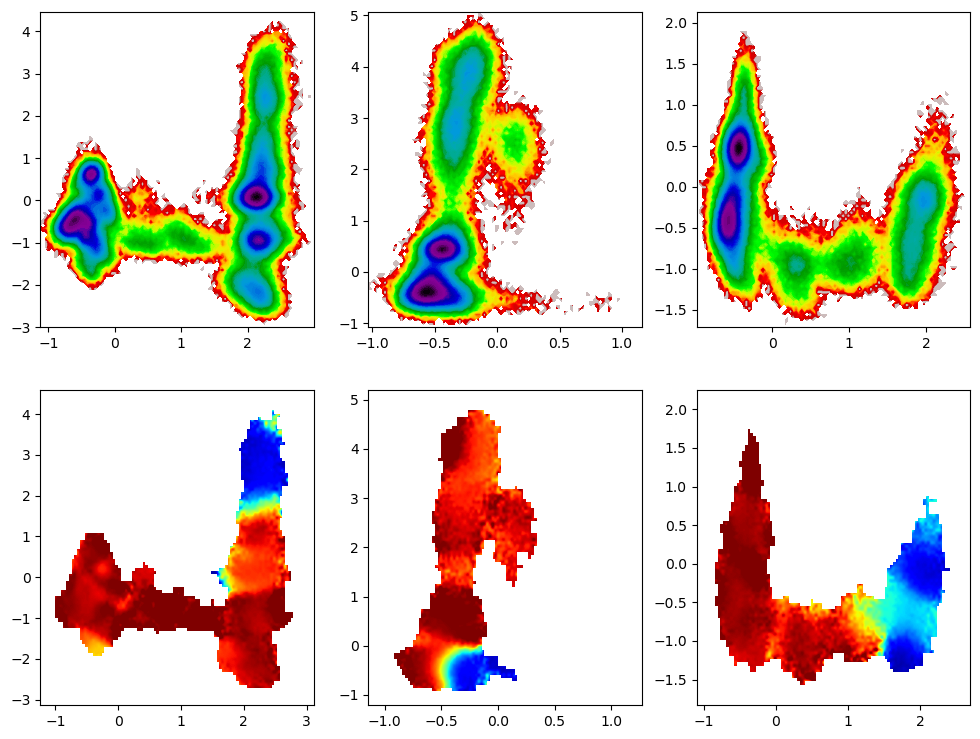

In [37]:
fimp = clf_wo_outliers_hc_average.feature_importances_

top200 = fimp.argsort()[::-1][:200]

sfeatures = [np.load(f'traj_specific_data/features_{i}.npy')[:,top200] for i in range(6)]
sfeatures = coor.tica(sfeatures, lag=100).get_output()


fig, ((ax01,ax41,ax31),(ax02,ax42,ax32)) =plt.subplots(2,3,figsize=(12,9))

for i in [0,4,3]:
    
    mplt.plot_free_energy( sfeatures[i][:,0], sfeatures[i][:,1], ax=eval(f'ax{i}1'), cbar=False )
    
    xmin, xmax, ymin, ymax, hist = hist_raw_data( sfeatures[i], np.log(eval(f'dist{i}')) )
    
    eval(f'ax{i}2').imshow( hist.T, origin='lower', extent=(xmin,xmax,ymin,ymax), aspect='auto',
                          vmin=0, vmax=2, interpolation='gaussian', cmap='jet')

plt.show()

### with and without outliers work in a similar fashion

# directly with eucledian distance based hc clustering

In [10]:
euclidean_pmt = pmt.calculate_direct_pmt(features, n_jobs=16)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 154120/154120 [56:12<00:00, 45.70it/s]


In [12]:
np.save('saved_data/euclidean_pmt.npy', euclidean_pmt)

In [6]:
euclidean_pmt = np.load('saved_data/euclidean_pmt.npy')

In [7]:
hc_euclidean = scc.hierarchy.linkage(euclidean_pmt, method='average')

In [8]:
np.save('saved_data/hc_euclidean.npy', hc_euclidean)

In [5]:
hc_euclidean = np.load('saved_data/hc_euclidean.npy')

In [7]:
for i in range(2,11):
    globals()[f'euclidean_hc_average_labels{i}'] = extras.get_hc_dtraj(hc_euclidean, nids=i)

In [10]:
for i in range(2,11):
    labels_ = eval(f'euclidean_hc_average_labels{i}')
    pops = {}
    for i in np.unique(labels_) :
        pops[int(i)] = len(np.where(labels_ == i)[0])
    print(pops)

{0: 1, 1: 154120}
{0: 1, 1: 529, 2: 153591}
{0: 1, 1: 529, 2: 3713, 3: 149878}
{0: 1, 1: 529, 2: 3713, 3: 149312, 4: 566}
{0: 1, 1: 529, 2: 3713, 3: 149312, 4: 1, 5: 565}
{0: 1, 1: 529, 2: 149312, 3: 1, 4: 565, 5: 4, 6: 3709}
{0: 1, 1: 529, 2: 149312, 3: 1, 4: 4, 5: 3709, 6: 1, 7: 564}
{0: 1, 1: 529, 2: 1, 3: 4, 4: 3709, 5: 1, 6: 564, 7: 2165, 8: 147147}
{0: 1, 1: 529, 2: 1, 3: 4, 4: 3709, 5: 1, 6: 564, 7: 2165, 8: 4106, 9: 143041}


removed labels: [0.]
removed labels: [0.]
removed labels: [0.]
removed labels: [0.]
removed labels: [0. 4.]
removed labels: [0. 3. 5.]
removed labels: [0. 3. 4. 6.]
removed labels: [0. 2. 3. 5.]
removed labels: [0. 2. 3. 5.]


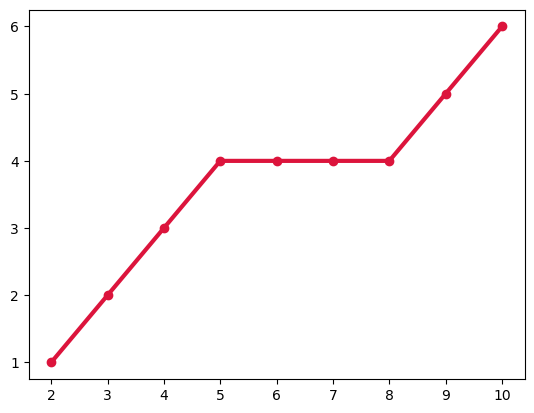

In [14]:
nclasses_wo_outliers = []
for i in range(2,11):
    dd = extras.get_dtraj_outliers( eval(f'euclidean_hc_average_labels{i}'), return_new=True )
    dd = np.unique(dd[1])
    nclasses_wo_outliers.append(len(dd))
    
plt.plot(range(2,11), nclasses_wo_outliers, '-o', lw=3, color='crimson')

## training on euclidean based hc clusters

In [15]:
for i in tqdm(range(2,11)):
    
    xtrain, _, ytrain, _ = splt(features, eval(f'euclidean_hc_average_labels{i}'), random_state=0, test_size=0.3)
    
    clf_ = rfc(n_estimators=1000, random_state=0, n_jobs=16)
    clf_.fit(xtrain, ytrain)
    
    globals()[f'clf_euclidean_hc_average_labels{i}'] = cp.deepcopy(clf_)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [45:34<00:00, 303.88s/it]


In [16]:
for i in range(2,11):
    _, xtest, _, ytest = splt(features, eval(f'euclidean_hc_average_labels{i}'), random_state=0, test_size=0.3)
    
    clf_ = eval(f'clf_euclidean_hc_average_labels{i}')
    pred_ = clf_.predict(xtest)
    print(f'{i} \t {acc(ytest, pred_)} \t {extras.get_f1_score( cfm(ytest, pred_), output_type="all" )}')

2 	 1.0 	 1
3 	 0.9998486060946861 	 [0.97777778 0.99992404]
4 	 0.9995458182840582 	 [0.97791798 0.99381625 0.99976639]
5 	 0.9993079135757078 	 [0.98101266 0.99248785 0.9996428  0.97087379]
6 	 0.9993079135757078 	 [0.98101266 0.99248785 0.9996428  0.97087379]


/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/extras.py:219: RuntimeWarning: invalid value encountered in scalar divide
  f2 = cmt[i,i] / np.sum(cmt[:,i])


7 	 0.9993079135757078 	 [0.97791798 0.99964279 0.97087379        nan 0.99381079]


/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/extras.py:219: RuntimeWarning: invalid value encountered in scalar divide
  f2 = cmt[i,i] / np.sum(cmt[:,i])


8 	 0.9993079135757078 	 [0.97791798 0.99964279        nan 0.99381079        nan 0.97402597]


/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/extras.py:219: RuntimeWarning: invalid value encountered in scalar divide
  f2 = cmt[i,i] / np.sum(cmt[:,i])


9 	 0.9992214027726712 	 [0.98101266        nan 0.99425541        nan 0.97402597 0.99533437
 0.99959229]
10 	 0.9992862858749486 	 [0.98101266        nan 0.99469496        nan 0.97402597 0.99689441
 1.         0.99961569]


/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/extras.py:219: RuntimeWarning: invalid value encountered in scalar divide
  f2 = cmt[i,i] / np.sum(cmt[:,i])


In [18]:
for i in range(2,11):
    clf_ = eval(f'clf_euclidean_hc_average_labels{i}')
    pkl.dump(clf_, open(f'saved_models/clf_euclidean_hc_average_labels{i}.pkl', 'wb'))

## checking results

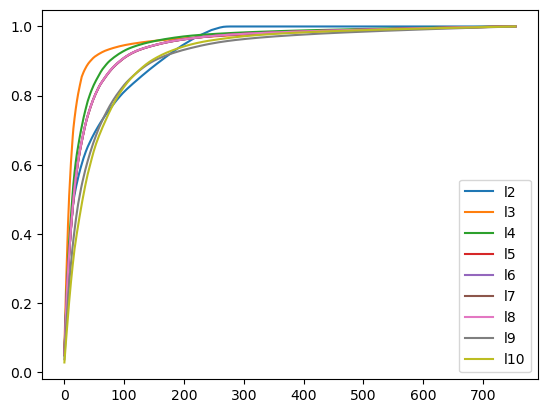

In [27]:
for i in range(2,11):
    dd = eval(f'clf_euclidean_hc_average_labels{i}').feature_importances_
    plt.plot(np.cumsum(dd[dd.argsort()[::-1]]), label=f'l{i}')
plt.legend()

### cls-2

/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:38: RuntimeWarning: invalid value encountered in divide
  histogram = np.divide(histogram, norm)


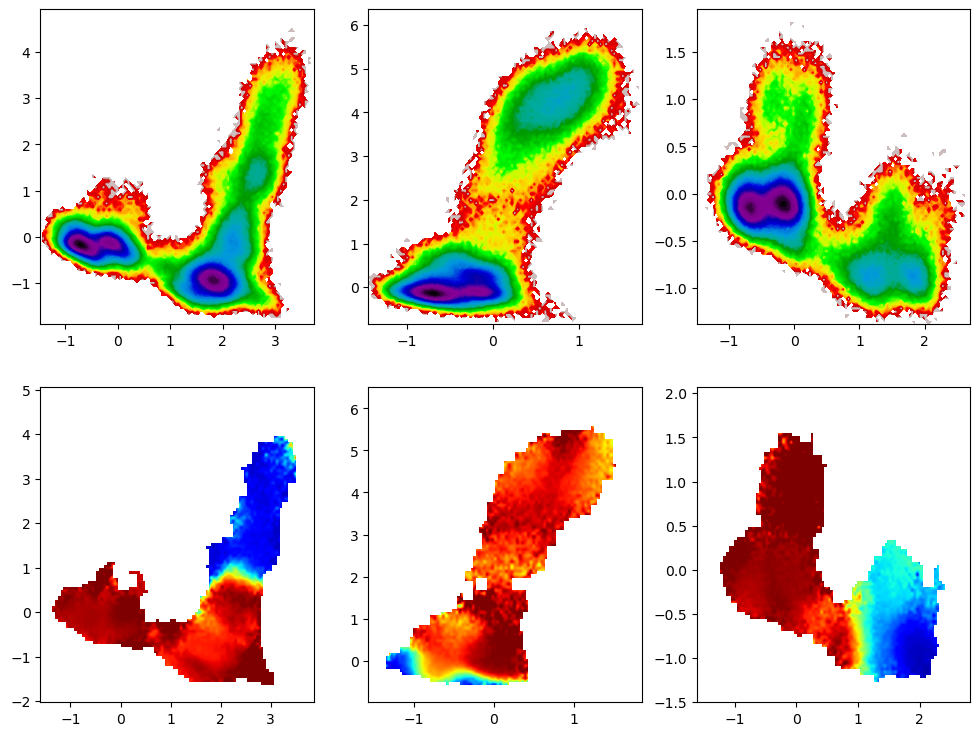

In [19]:
fimp = clf_euclidean_hc_average_labels2.feature_importances_

top200 = fimp.argsort()[::-1][:200]

sfeatures = [np.load(f'traj_specific_data/features_{i}.npy')[:,top200] for i in range(6)]
sfeatures = coor.tica(sfeatures, lag=100).get_output()


fig, ((ax01,ax41,ax31),(ax02,ax42,ax32)) =plt.subplots(2,3,figsize=(12,9))

for i in [0,4,3]:
    
    mplt.plot_free_energy( sfeatures[i][:,0], sfeatures[i][:,1], ax=eval(f'ax{i}1'), cbar=False )
    
    xmin, xmax, ymin, ymax, hist = hist_raw_data( sfeatures[i], np.log(eval(f'dist{i}')) )
    
    eval(f'ax{i}2').imshow( hist.T, origin='lower', extent=(xmin,xmax,ymin,ymax), aspect='auto',
                          vmin=0, vmax=2, interpolation='gaussian', cmap='jet')

plt.show()

### cls-3

/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:38: RuntimeWarning: invalid value encountered in divide
  histogram = np.divide(histogram, norm)


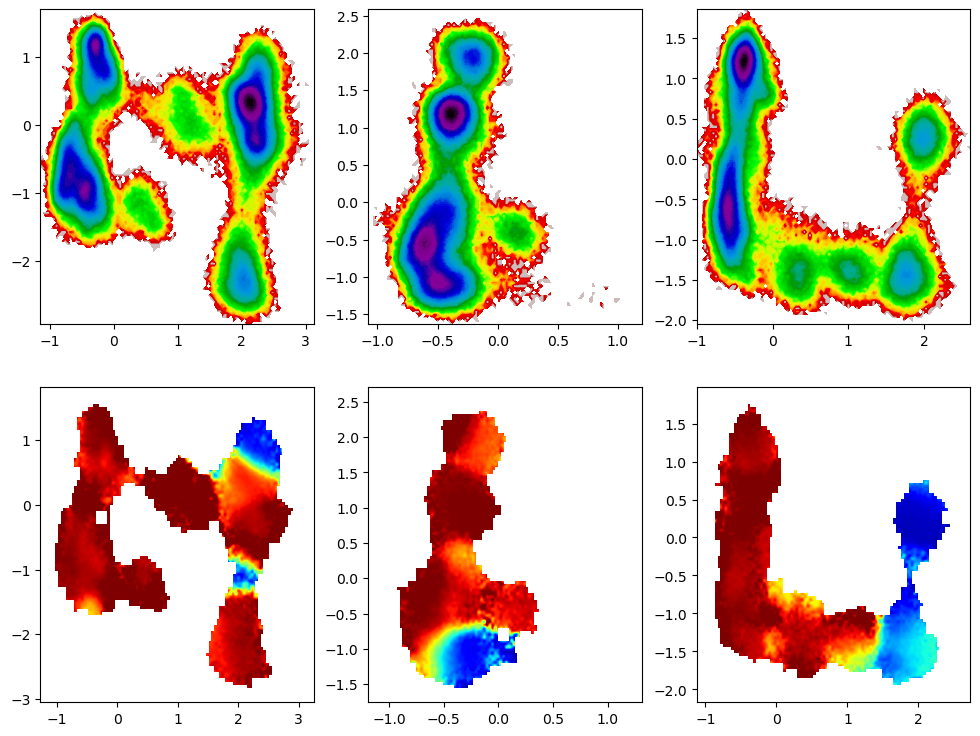

In [21]:
fimp = clf_euclidean_hc_average_labels3.feature_importances_

top200 = fimp.argsort()[::-1][:200]

sfeatures = [np.load(f'traj_specific_data/features_{i}.npy')[:,top200] for i in range(6)]
sfeatures = coor.tica(sfeatures, lag=100).get_output()


fig, ((ax01,ax41,ax31),(ax02,ax42,ax32)) =plt.subplots(2,3,figsize=(12,9))

for i in [0,4,3]:
    
    mplt.plot_free_energy( sfeatures[i][:,0], sfeatures[i][:,1], ax=eval(f'ax{i}1'), cbar=False )
    
    xmin, xmax, ymin, ymax, hist = hist_raw_data( sfeatures[i], np.log(eval(f'dist{i}')) )
    
    eval(f'ax{i}2').imshow( hist.T, origin='lower', extent=(xmin,xmax,ymin,ymax), aspect='auto',
                          vmin=0, vmax=2, interpolation='gaussian', cmap='jet')

plt.show()

### cls-4

/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:38: RuntimeWarning: invalid value encountered in divide
  histogram = np.divide(histogram, norm)


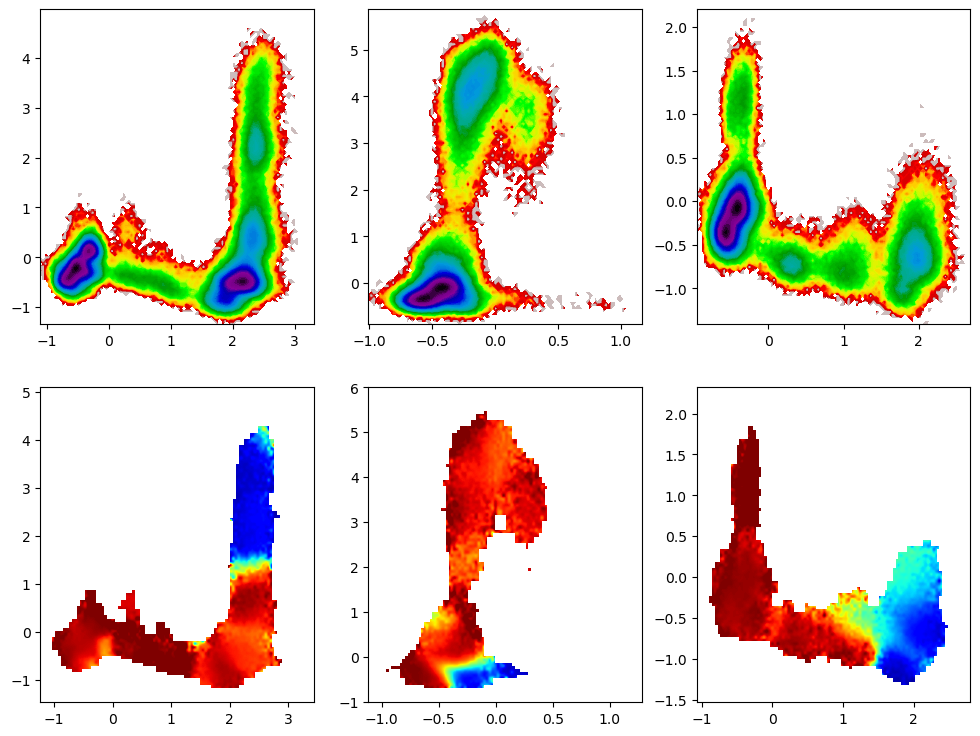

In [23]:
fimp = clf_euclidean_hc_average_labels4.feature_importances_

top200 = fimp.argsort()[::-1][:200]

sfeatures = [np.load(f'traj_specific_data/features_{i}.npy')[:,top200] for i in range(6)]
sfeatures = coor.tica(sfeatures, lag=100).get_output()


fig, ((ax01,ax41,ax31),(ax02,ax42,ax32)) =plt.subplots(2,3,figsize=(12,9))

for i in [0,4,3]:
    
    mplt.plot_free_energy( sfeatures[i][:,0], sfeatures[i][:,1], ax=eval(f'ax{i}1'), cbar=False )
    
    xmin, xmax, ymin, ymax, hist = hist_raw_data( sfeatures[i], np.log(eval(f'dist{i}')) )
    
    eval(f'ax{i}2').imshow( hist.T, origin='lower', extent=(xmin,xmax,ymin,ymax), aspect='auto',
                          vmin=0, vmax=2, interpolation='gaussian', cmap='jet')

plt.show()

### cls-8 

/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:38: RuntimeWarning: invalid value encountered in divide
  histogram = np.divide(histogram, norm)


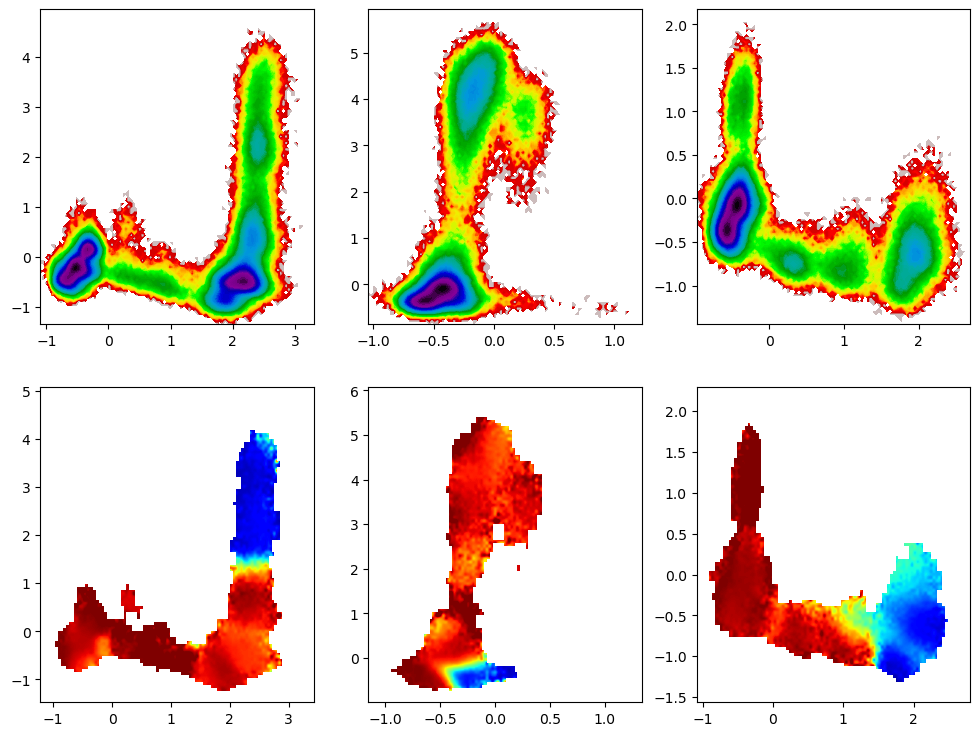

In [29]:
fimp = clf_euclidean_hc_average_labels8.feature_importances_

top200 = fimp.argsort()[::-1][:200]

sfeatures = [np.load(f'traj_specific_data/features_{i}.npy')[:,top200] for i in range(6)]
sfeatures = coor.tica(sfeatures, lag=100).get_output()


fig, ((ax01,ax41,ax31),(ax02,ax42,ax32)) =plt.subplots(2,3,figsize=(12,9))

for i in [0,4,3]:
    
    mplt.plot_free_energy( sfeatures[i][:,0], sfeatures[i][:,1], ax=eval(f'ax{i}1'), cbar=False )
    
    xmin, xmax, ymin, ymax, hist = hist_raw_data( sfeatures[i], np.log(eval(f'dist{i}')) )
    
    eval(f'ax{i}2').imshow( hist.T, origin='lower', extent=(xmin,xmax,ymin,ymax), aspect='auto',
                          vmin=0, vmax=2, interpolation='gaussian', cmap='jet')

plt.show()

### cls-9

/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:38: RuntimeWarning: invalid value encountered in divide
  histogram = np.divide(histogram, norm)


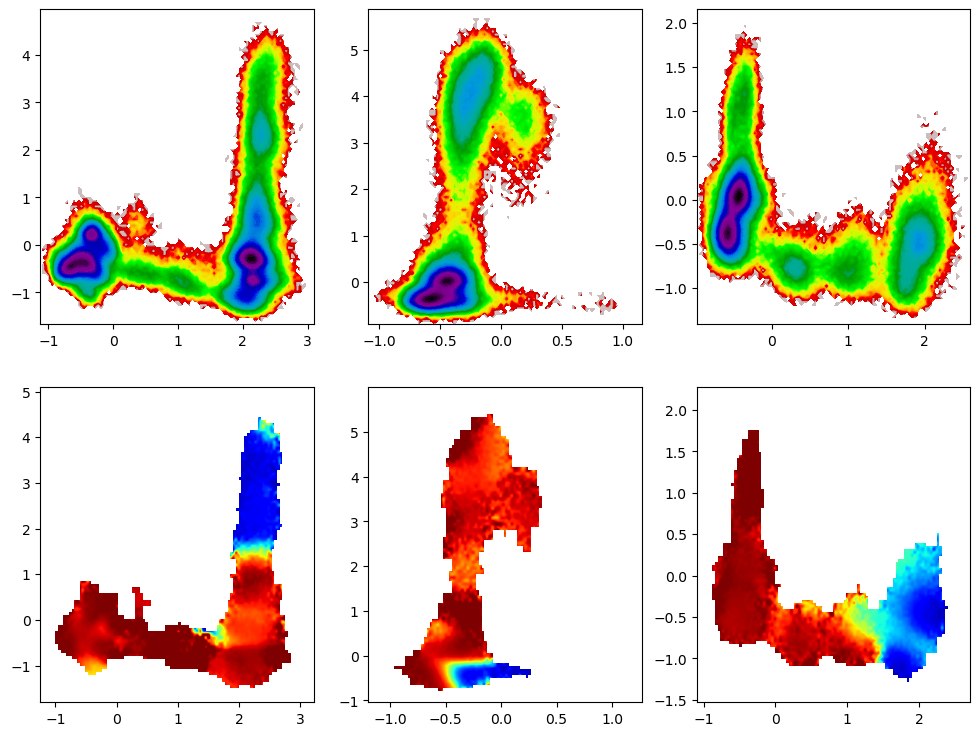

In [28]:
fimp = clf_euclidean_hc_average_labels9.feature_importances_

top200 = fimp.argsort()[::-1][:200]

sfeatures = [np.load(f'traj_specific_data/features_{i}.npy')[:,top200] for i in range(6)]
sfeatures = coor.tica(sfeatures, lag=100).get_output()


fig, ((ax01,ax41,ax31),(ax02,ax42,ax32)) =plt.subplots(2,3,figsize=(12,9))

for i in [0,4,3]:
    
    mplt.plot_free_energy( sfeatures[i][:,0], sfeatures[i][:,1], ax=eval(f'ax{i}1'), cbar=False )
    
    xmin, xmax, ymin, ymax, hist = hist_raw_data( sfeatures[i], np.log(eval(f'dist{i}')) )
    
    eval(f'ax{i}2').imshow( hist.T, origin='lower', extent=(xmin,xmax,ymin,ymax), aspect='auto',
                          vmin=0, vmax=2, interpolation='gaussian', cmap='jet')

plt.show()

### cls-10

/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/msahil/softwares/miniconda3/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

/home/msahil/unsupervised_random_forest/2_jctc_urf/../0_python_modules/navjeet_hist.py:38: RuntimeWarning: invalid value encountered in divide
  histogram = np.divide(histogram, norm)


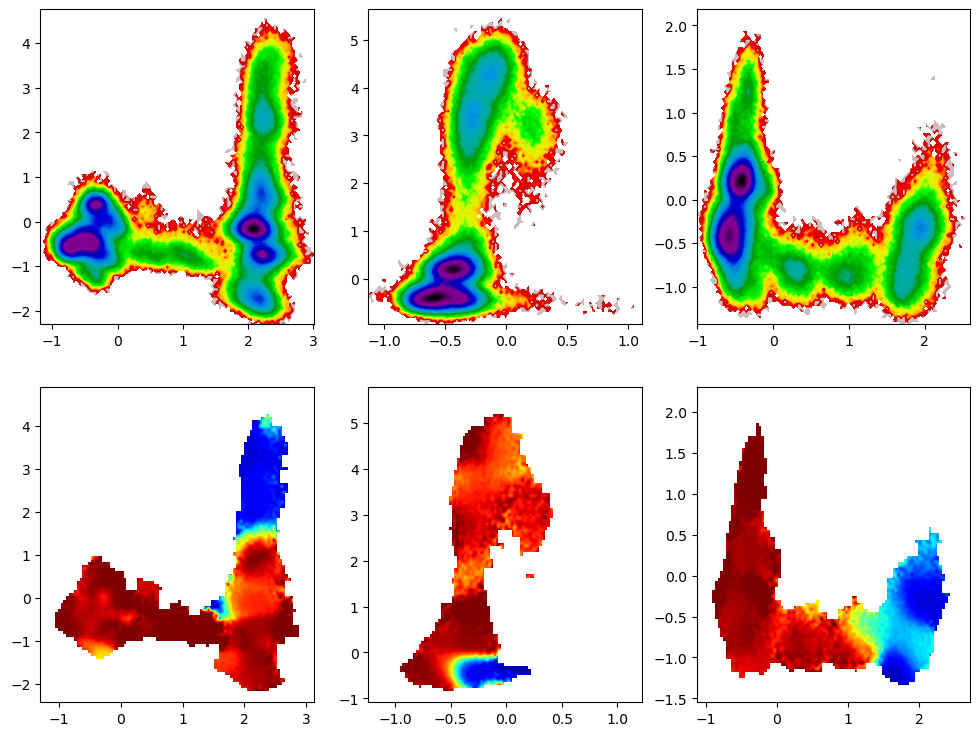

In [25]:
fimp = clf_euclidean_hc_average_labels10.feature_importances_

top200 = fimp.argsort()[::-1][:200]

sfeatures = [np.load(f'traj_specific_data/features_{i}.npy')[:,top200] for i in range(6)]
sfeatures = coor.tica(sfeatures, lag=100).get_output()


fig, ((ax01,ax41,ax31),(ax02,ax42,ax32)) =plt.subplots(2,3,figsize=(12,9))

for i in [0,4,3]:
    
    mplt.plot_free_energy( sfeatures[i][:,0], sfeatures[i][:,1], ax=eval(f'ax{i}1'), cbar=False )
    
    xmin, xmax, ymin, ymax, hist = hist_raw_data( sfeatures[i], np.log(eval(f'dist{i}')) )
    
    eval(f'ax{i}2').imshow( hist.T, origin='lower', extent=(xmin,xmax,ymin,ymax), aspect='auto',
                          vmin=0, vmax=2, interpolation='gaussian', cmap='jet')

plt.show()